In [22]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from operator import itemgetter

%matplotlib inline

In [23]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2 
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2 
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

## 加载数据

In [24]:
# 加载数据
import os
import wget


def read_csv(path, seq=' ', remote=False):
    """读取csv,若是远程文件第一次远程读取，下载在本地，以后直接从本地读取"""
    out_path = path.split('/')[-1] + '.csv'        
    if not remote:
        return pd.read_csv(out_path, seq)
    if os.path.exists(out_path):
        os.remove(out_path)
    wget.download(path, out_path)
    return pd.read_csv(out_path, seq)

In [25]:
train_df = read_csv('https://query.data.world/s/gthedhekbujsbrb2xv6xw5upd2cpvn')
test_df = read_csv('https://query.data.world/s/sclhycnxm36nefhxqis7itzs6wz5g5')

train_df = reduce_mem_usage(train_df)
test_df = reduce_mem_usage(test_df)

print('train data shape: ', train_df.shape)
print('test data shape: ', test_df.shape)
train_df.head(10)

Memory usage of dataframe is 35.48 MB
Memory usage after optimization is: 9.73 MB
Decreased by 72.6%
Memory usage of dataframe is 11.44 MB
Memory usage after optimization is: 3.05 MB
Decreased by 73.3%
train data shape:  (150000, 31)
test data shape:  (50000, 30)


,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235718,0.101990,0.129517,0.022812,0.097473,-2.880859,2.804688,-2.419922,0.795410,0.914551
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264893,0.121033,0.135742,0.026596,0.020584,-4.902344,2.095703,-1.030273,-1.722656,0.245483
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251465,0.114929,0.165161,0.062164,0.027069,-4.847656,1.803711,1.565430,-0.832520,-0.229980
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274414,0.110291,0.121948,0.033386,0.000000,-4.507812,1.286133,-0.501953,-2.437500,-0.478760
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228027,0.073181,0.091858,0.078796,0.121521,-1.896484,0.910645,0.931152,2.833984,1.923828
5,5,137642,20090602,24.0,10,0.0,1.0,0.0,109,10.0,...,0.260254,0.000518,0.119812,0.090942,0.048767,1.885742,-2.722656,2.457031,-0.286865,0.206543
6,6,2402,19990411,13.0,4,0.0,0.0,1.0,150,15.0,...,0.268066,0.117676,0.142334,0.025452,0.028168,-4.902344,1.610352,-0.834473,-1.996094,-0.103210
7,7,165346,19990706,26.0,14,1.0,0.0,0.0,101,15.0,...,0.239502,0.000000,0.122925,0.039825,0.082397,3.693359,-0.244995,-2.193359,0.236694,0.195557
8,8,2974,20030205,19.0,1,2.0,1.0,1.0,179,15.0,...,0.263916,0.116577,0.144287,0.039856,0.024384,-4.925781,1.587891,0.075317,-1.550781,0.069458
9,9,82021,19980101,7.0,7,5.0,0.0,0.0,88,15.0,...,0.262451,0.068237,0.012177,0.010292,0.098755,-1.089844,0.600586,-4.187500,0.198242,-1.025391


In [30]:
train_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
SaleID,0,1,2,3,4,5,6,7,8,9
name,736,2262,14874,71865,111080,137642,2402,165346,2974,82021
regDate,20040402,20030301,20040403,19960908,20120103,20090602,19990411,19990706,20030205,19980101
model,30,40,115,109,110,24,13,26,19,7
brand,6,1,15,10,5,10,4,14,1,7
bodyType,1,2,1,0,1,0,0,1,2,5
fuelType,0,0,0,0,0,1,0,0,1,0
gearbox,0,0,0,1,0,0,1,0,1,0
power,60,0,163,193,68,109,150,101,179,88
kilometer,12.5,15,12.5,15,5,10,15,15,15,15


## 异常值处理

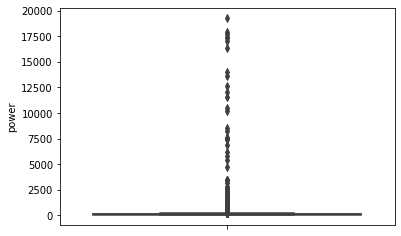

In [26]:
import seaborn as sns

sns.boxplot(y=train_df["power"]);

## 特征处理

In [27]:
train_df['flag'] = 1
test_df['flag'] = 0

data = pd.concat([train_df, test_df], ignore_index=True, sort=False)
data['used_day'] = (pd.to_datetime(data['creatDate'], format='%Y%m%d', errors='coerce')-pd.to_datetime(data['regDate'], format='%Y%m%d', errors='coerce')).dt.days
data['notRepairedDamage'].replace('-', np.nan, inplace=True)

In [28]:
numeric_features = ['SaleID', 'used_day', 'power', 'kilometer', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14']
categorical_features = ['model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode', 'flag']
features = list(set(numeric_features + categorical_features))
data[features].to_csv('features.csv', index=False)

## lightGBM 模型

In [35]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

train_df = data[data['flag']==1]
features = [item for item in features if item not in ('price', 'SaleID', 'name')]
label = 'price'

X_train, X_valid, y_train, y_valid = train_test_split(train_df[features], train_df[label], random_state=666)
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_valid = lgb.Dataset(X_valid, label=y_valid)

# 设置参数
boost_round = 1000
early_stop_rounds = 50

results = {}
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'learning_rate': 0.05,    
    'max_depth': 8,
    'num_leaves': 256,
    'min_child_samples': 15,       
    'min_child_weight': 0.1,
    'feature_fraction': 0.6,    
    'metric': 'mae'
}
gbm = lgb.train(
    params=params,     
    train_set=lgb_train,  
    num_boost_round=boost_round,
    valid_sets=(lgb_valid, lgb_train),
    valid_names=('validate','train'),
    early_stopping_rounds=early_stop_rounds,
    evals_result= results
)

[1]	train's l1: 4759.34	validate's l1: 4755.61
Training until validation scores don't improve for 50 rounds
[2]	train's l1: 4536.09	validate's l1: 4532.41
[3]	train's l1: 4322.34	validate's l1: 4319.12
[4]	train's l1: 4118.58	validate's l1: 4116.97
[5]	train's l1: 3926.35	validate's l1: 3925.53
[6]	train's l1: 3744.4	validate's l1: 3744.63
[7]	train's l1: 3571.49	validate's l1: 3573.31
[8]	train's l1: 3407.59	validate's l1: 3410.38
[9]	train's l1: 3252.61	validate's l1: 3255.74
[10]	train's l1: 3104.9	validate's l1: 3109.02
[11]	train's l1: 2966.23	validate's l1: 2970.91
[12]	train's l1: 2835.81	validate's l1: 2840.96
[13]	train's l1: 2711.36	validate's l1: 2716.67
[14]	train's l1: 2593.89	validate's l1: 2600.14
[15]	train's l1: 2482.06	validate's l1: 2489.34
[16]	train's l1: 2375.02	validate's l1: 2383.21
[17]	train's l1: 2274.2	validate's l1: 2282.94
[18]	train's l1: 2178.32	validate's l1: 2187.65
[19]	train's l1: 2092.01	validate's l1: 2102.21
[20]	train's l1: 2006.08	validate's l1:

[215]	train's l1: 501.852	validate's l1: 596.243
[216]	train's l1: 501.204	validate's l1: 595.793
[217]	train's l1: 500.689	validate's l1: 595.79
[218]	train's l1: 500.154	validate's l1: 595.52
[219]	train's l1: 499.563	validate's l1: 595.141
[220]	train's l1: 499.098	validate's l1: 594.851
[221]	train's l1: 498.841	validate's l1: 594.82
[222]	train's l1: 498.613	validate's l1: 594.749
[223]	train's l1: 498.253	validate's l1: 594.605
[224]	train's l1: 498.087	validate's l1: 594.571
[225]	train's l1: 497.532	validate's l1: 594.229
[226]	train's l1: 497.173	validate's l1: 594.087
[227]	train's l1: 496.636	validate's l1: 593.805
[228]	train's l1: 496.454	validate's l1: 593.764
[229]	train's l1: 496.026	validate's l1: 593.504
[230]	train's l1: 495.663	validate's l1: 593.27
[231]	train's l1: 495.033	validate's l1: 593.005
[232]	train's l1: 494.625	validate's l1: 592.782
[233]	train's l1: 494.394	validate's l1: 592.761
[234]	train's l1: 494.023	validate's l1: 592.576
[235]	train's l1: 493.62

[432]	train's l1: 432.942	validate's l1: 565.164
[433]	train's l1: 432.796	validate's l1: 565.109
[434]	train's l1: 432.436	validate's l1: 564.952
[435]	train's l1: 432.172	validate's l1: 564.951
[436]	train's l1: 432.071	validate's l1: 564.884
[437]	train's l1: 431.875	validate's l1: 564.778
[438]	train's l1: 431.854	validate's l1: 564.774
[439]	train's l1: 431.643	validate's l1: 564.708
[440]	train's l1: 431.595	validate's l1: 564.688
[441]	train's l1: 431.35	validate's l1: 564.565
[442]	train's l1: 431.012	validate's l1: 564.406
[443]	train's l1: 430.723	validate's l1: 564.284
[444]	train's l1: 430.629	validate's l1: 564.281
[445]	train's l1: 430.481	validate's l1: 564.255
[446]	train's l1: 429.997	validate's l1: 564.05
[447]	train's l1: 429.795	validate's l1: 563.938
[448]	train's l1: 429.65	validate's l1: 563.887
[449]	train's l1: 429.565	validate's l1: 563.827
[450]	train's l1: 429.338	validate's l1: 563.796
[451]	train's l1: 429.007	validate's l1: 563.711
[452]	train's l1: 428.8

[648]	train's l1: 387.468	validate's l1: 550.363
[649]	train's l1: 387.247	validate's l1: 550.25
[650]	train's l1: 387.094	validate's l1: 550.204
[651]	train's l1: 386.978	validate's l1: 550.22
[652]	train's l1: 386.824	validate's l1: 550.192
[653]	train's l1: 386.71	validate's l1: 550.165
[654]	train's l1: 386.363	validate's l1: 550.001
[655]	train's l1: 386.203	validate's l1: 549.988
[656]	train's l1: 386.107	validate's l1: 549.969
[657]	train's l1: 385.871	validate's l1: 549.897
[658]	train's l1: 385.669	validate's l1: 549.801
[659]	train's l1: 385.595	validate's l1: 549.802
[660]	train's l1: 385.514	validate's l1: 549.802
[661]	train's l1: 385.394	validate's l1: 549.752
[662]	train's l1: 384.993	validate's l1: 549.514
[663]	train's l1: 384.835	validate's l1: 549.485
[664]	train's l1: 384.696	validate's l1: 549.457
[665]	train's l1: 384.574	validate's l1: 549.425
[666]	train's l1: 384.332	validate's l1: 549.37
[667]	train's l1: 384.235	validate's l1: 549.353
[668]	train's l1: 384.12

[858]	train's l1: 354.945	validate's l1: 541.413
[859]	train's l1: 354.827	validate's l1: 541.356
[860]	train's l1: 354.736	validate's l1: 541.312
[861]	train's l1: 354.644	validate's l1: 541.307
[862]	train's l1: 354.494	validate's l1: 541.295
[863]	train's l1: 354.397	validate's l1: 541.273
[864]	train's l1: 354.279	validate's l1: 541.237
[865]	train's l1: 354.155	validate's l1: 541.186
[866]	train's l1: 354.019	validate's l1: 541.17
[867]	train's l1: 353.826	validate's l1: 541.186
[868]	train's l1: 353.766	validate's l1: 541.17
[869]	train's l1: 353.665	validate's l1: 541.158
[870]	train's l1: 353.546	validate's l1: 541.135
[871]	train's l1: 353.44	validate's l1: 541.1
[872]	train's l1: 353.235	validate's l1: 541.038
[873]	train's l1: 353.137	validate's l1: 541.023
[874]	train's l1: 353.003	validate's l1: 540.989
[875]	train's l1: 352.915	validate's l1: 540.989
[876]	train's l1: 352.776	validate's l1: 540.995
[877]	train's l1: 352.63	validate's l1: 540.943
[878]	train's l1: 352.539	